In [406]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

In [407]:
df = pd.read_csv('PierceCricketData.csv')
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [408]:
#get training data

trainX, trainY = (df['Chirps'].values, df['Temp'].values)

print('X:', trainX)
print('Y:',trainY)

X: [ 20.   16.   19.8  18.4  17.1  15.5  14.7  17.1  15.4  16.2  15.   17.2
  16.   17.   14.1]
Y: [ 88.6  71.6  93.3  84.3  80.6  75.2  69.7  82.   69.4  83.3  78.6  82.6
  80.6  83.5  76.3]


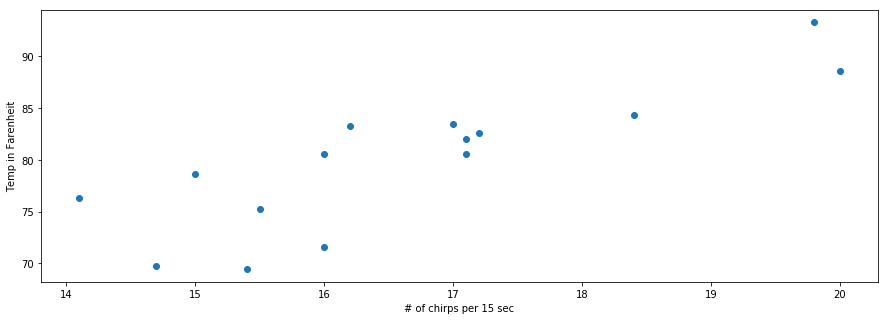

In [409]:
plt.xlabel("# of chirps per 15 sec")
plt.ylabel("Temp in Farenheit")
plt.plot(trainX, trainY, 'o')

In [410]:
#Create placeholders

X, Y = tf.placeholder(tf.float32), tf.placeholder(tf.float32)
W, b = tf.Variable(np.random.randn()), tf.Variable(np.random.randn())

In [411]:
#Activation function

Ypred = tf.add(tf.multiply(X, W), b)

( 20.0 , -38.1125 )
( 16.0 , -30.5536 )
( 19.8 , -37.7346 )
( 18.4 , -35.0889 )
( 17.1 , -32.6323 )
( 15.5 , -29.6087 )
( 14.7 , -28.0969 )
( 17.1 , -32.6323 )
( 15.4 , -29.4198 )
( 16.2 , -30.9315 )
( 15.0 , -28.6639 )
( 17.2 , -32.8213 )
( 16.0 , -30.5536 )
( 17.0 , -32.4433 )
( 14.1 , -26.9631 )


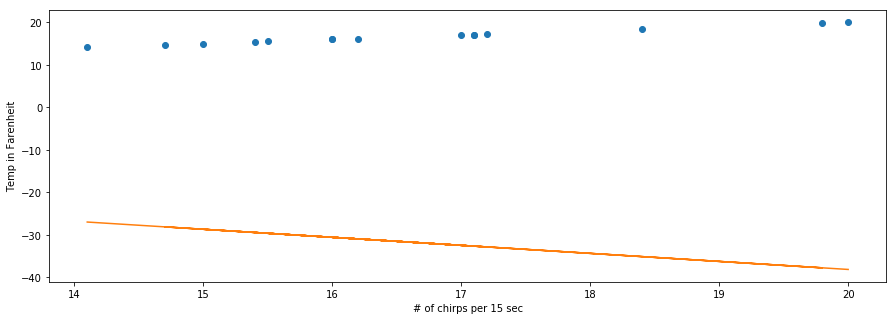

In [412]:
#initial linear model

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    pred = session.run(Ypred, feed_dict = {X:trainX})
    for (x, y) in zip(trainX, pred):
        print('(',x, ',', y, ')')
    plt.xlabel("# of chirps per 15 sec")
    plt.ylabel("Temp in Farenheit")
    plt.plot(trainX, trainX, "o")
    plt.plot(trainX, pred)

In [413]:
#training cycles / epochs, learning rate, display step size

training_cycles = 1000
learning_rate = 0.001
step_size = 50

# loss function = mean squared difference error 
loss = tf.reduce_mean(tf.squared_difference(Ypred, Y))

#train with gradient descent optimizer for minimizing loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Training cycle:  0 	 W=  1.85569 	 b=  -0.0944649 	 loss=  2438.824951172
Training cycle: 50 	 W=  4.7861 	 b=  0.105918 	 loss=  19.368717194
Training cycle: 100 	 W=  4.78456 	 b=  0.131765 	 loss=  19.355306625
Training cycle: 150 	 W=  4.78303 	 b=  0.157587 	 loss=  19.341922760
Training cycle: 200 	 W=  4.78149 	 b=  0.183382 	 loss=  19.328578949
Training cycle: 250 	 W=  4.77996 	 b=  0.209152 	 loss=  19.315242767
Training cycle: 300 	 W=  4.77842 	 b=  0.234896 	 loss=  19.301935196
Training cycle: 350 	 W=  4.77689 	 b=  0.260614 	 loss=  19.288667679
Training cycle: 400 	 W=  4.77536 	 b=  0.286307 	 loss=  19.275413513
Training cycle: 450 	 W=  4.77384 	 b=  0.311974 	 loss=  19.262189865
Training cycle: 500 	 W=  4.77231 	 b=  0.337615 	 loss=  19.248994827
Training cycle: 550 	 W=  4.77079 	 b=  0.363231 	 loss=  19.235828400
Training cycle: 600 	 W=  4.76926 	 b=  0.388822 	 loss=  19.222681046
Training cycle: 650 	 W=  4.76774 	 b=  0.414387 	 loss=  19.209558487
Train

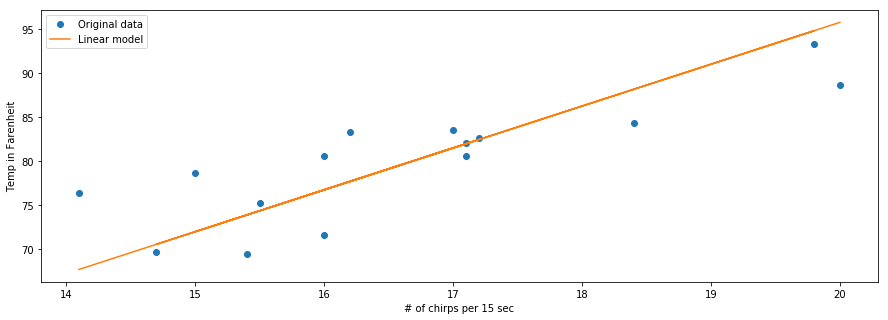

In [414]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost = []
    for step in range(training_cycles):
        sess.run(optimizer, feed_dict={X: trainX, Y: trainY})
        if step % step_size == 0:
            losses = sess.run(loss, feed_dict={X: trainX, Y:trainY})
            cost.append(losses)
            print ("Training cycle:", '{:2d}'.format(step),
                   "\t W= ", sess.run(W), 
                   "\t b= ", sess.run(b), 
                   "\t loss= ", "{:.9f}".format(losses))
                
    print ("\nOptimization done!")
    print("Your linear model is:" )
    training_cost = sess.run(loss, feed_dict={X: trainX, Y: trainY})
    print ( "W=", sess.run(W), 
           "\t b=", sess.run(b), 
           "\t loss=", training_cost, '\n')

    #plot display
    
    plt.xlabel("# of chirps per 15 sec")
    plt.ylabel("Temp in Farenheit")
    plt.plot(trainX, trainY, 'o', label='Original data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Linear model')
    plt.legend()

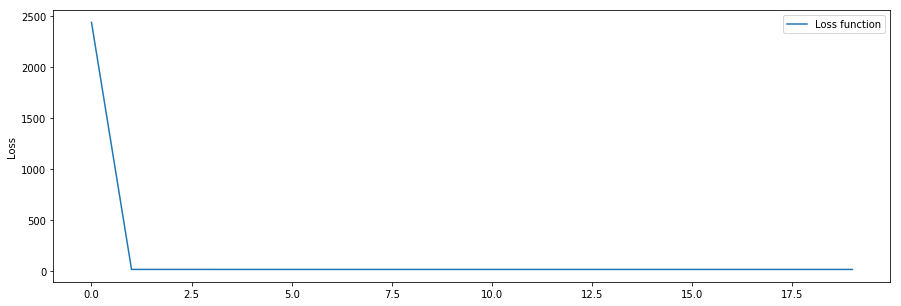

In [415]:
plt.ylabel("Loss")
plt.plot(cost, label = 'Loss function')
plt.legend()